# Deep Learning with Python

## 6.1  Working with text data

> 处理文本数据

要用深度学习的神经网络处理文本数据，和图片类似，也要把数据向量化：文本 -> 数值张量。

要做这种事情可以把每个单词变成向量，也可以把字符变成向量，还可以把多个连续单词或字符(称为 *N-grams*)变成向量。

反正不管如何划分，我们把文本拆分出来的单元叫做 *tokens*（标记），拆分文本的过程叫做 *tokenization*(分词)。

> 注：token 的中文翻译是“标记”😂。这些翻译都怪怪的，虽然 token 确实有标记这个意思，但把这里的 token 翻译成标记就没内味儿了。我觉得 token 是那种以一个东西代表另一个东西来使用的意思，这种 token 是一种有实体的东西，比如代金券。“标记”这个词在字典上作名词是「起标示作用的记号」的意思，而我觉得记号不是个很实体的东西。代金券不是一种记号、也就能说是标记，同样的，这里的 token 也是一种实体的东西，我觉得不能把它说成是“标记”。我不赞同这种译法，所以下文所有涉及 token 的地方统一写成 “token”，不翻译成“标记”。


文本的向量化就是先作分词，然后把生成出来的 token 逐个与数值向量对应起来，最后拿对应的数值向量合成一个表达了原文本的张量。其中，比较有意思的是如何建立 token 和 数值向量 的联系，下面介绍两种搞这个的方法：one-hot encoding(one-hot编码) 和 token embedding(标记嵌入)，其中 token embedding 一般都用于单词，叫作词嵌入「word embedding」。

![文本的向量化：从文本到token再到张量](https://tva1.sinaimg.cn/large/007S8ZIlgy1ghek3mhp38j31320mg0v8.jpg)


### n-grams 和词袋(bag-of-words)

n-gram 是能从一个句子中提取出的 ≤N 个连续单词的集合。例如：「The cat sat on the mat.」

这个句子分解成 2-gram 是：

```
{"The", "The cat", "cat", "cat sat", "sat",
  "sat on", "on", "on the", "the", "the mat", "mat"}
```

这个集合被叫做 bag-of-2-grams (二元语法袋)。

分解成 3-gram 是：

```
{"The", "The cat", "cat", "cat sat", "The cat sat",
  "sat", "sat on", "on", "cat sat on", "on the", "the",
  "sat on the", "the mat", "mat", "on the mat"}
```

这个集合被叫做 bag-of-3-grams (三元语法袋)。

把这东西叫做「袋」是因为它只是 tokens 组成的集合，没有原来文本的顺序和意义。把文本分成这种袋的分词方法叫做「词袋(bag-of-words)」。

由于词袋是不保存顺序的（分出来是集合，不是序列），所以一般不在深度学习里面用。但在轻量级的浅层文本处理模型里面，n-gram 和词袋还是很重要的方法的。

### one-hot 编码

one-hot 是比较基本、常用的。其做法是将每个 token 与一个唯一整数索引关联， 然后将整数索引 i 转换为长度为 N 的二进制向量(N 是词表大小)，这个向量只有第 i 个元素为 1，其余元素都为 0。

下面给出两个玩具版本的 one-hot 编码示例：

In [1]:
# 单词级的 one-hot 编码

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
# 对样本进行分词。只考虑每个样本前 max_length 个单词
max_length = 10

results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [3]:
# 字符级的 one-hot 编码

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable    # 所有可打印的 ASCII 字符
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
        
print(results)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Keras 内置了比刚才写的这种玩具版本强大得多的 one-hot 编码工具，在现实使用中，你应该使用这种方法，而不是使用刚才的玩具版本：

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)    # 只考虑前 1000 个最常见的单词
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)    # 将字符串转换为整数索引组成的列表
print('sequences:', sequences)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')  # 直接得到 one-hot 二进制表示

word_index = tokenizer.word_index    # 单词索引，就是词表字典啦，用这个就可以还原数据

print(f'one_hot_results: shape={one_hot_results.shape}:\n', one_hot_results, )
print(f'Found {len(word_index)} unique tokens.', 'word_index:', word_index)

sequences: [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
one_hot_results: shape=(2, 1000):
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Found 9 unique tokens. word_index: {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


这种 one-hot 编码还有一种简单的变种叫做 *one-hot hashing trick*（one-hot 散列技巧），这个方法的思想是不对每个 token 关联唯一的整数索引，而是用哈希函数去作用，把文本直接映射成一个固定长度的向量。

用这种方法可以节省维护单词索引的内存开销，还可以实现在线编码（来一个编码一个，不影响之、之后的）；但也有一些弊端：可能出现散列冲突，编码后的数据也不能够还原。

In [23]:
# 使用散列技巧的单词级的 one-hot 编码，玩具版本

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000  # 将单词保存为长度为 1000 的向量，单词越多这个值就要越大，不然散列冲突可能会加大
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality  # 将单词散列到 0~dimensionality 范围内的一个随机整数索引
        results[i, j, index] = 1.

print(results.shape)
print(results)

(2, 10, 1000)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### 词嵌入

从前面的例子中也可以看到 one-hot 的这种硬编码得到的结果向量十分稀疏，并且维度比较高。

词嵌入（word embedding）是另一种将单词与向量相关联的常用方法。这种方法可以得到比 one-hot 更加密集、低维的编码。词嵌入的结果是要从数据中学习得到的。

![one-hot编码与词嵌入的区别](https://tva1.sinaimg.cn/large/007S8ZIlgy1gheskpva1tj31fq0u0aeq.jpg)

运用词嵌入有两种方法：

1. 利用 Embedding 层学习词嵌入：在完成着手进行的主要任务(比如文档分类或情感预测)的同时学习词嵌入：一开始使用随机的词向量，然后对词向量用与学习神经网络的权重相同的方法进行学习。
2. 利用预训练词嵌入(pretrained word embedding)：在不同于待解决问题的机器学习任务上预训练好词嵌入，然后将其加载到模型中。


#### 利用 Embedding 层学习词嵌入

一个理想的词嵌入空间应该是可以比较完美地映射人类语言的。它是有符合现实的结构的，相近的词在空间中就应该比较接近，并且词嵌入空间中的方向也是要有意义的。例如一个比较简单的例子：

![词嵌入空间的简单示例](https://tva1.sinaimg.cn/large/007S8ZIlgy1ghetlonkiij30i40lmmyf.jpg)

在这个词嵌入空间中，宠物都在靠下的位置，野生动物都在靠上的位置，所以一个从下到上方向的向量就应该是表示从宠物到野生动物的，这个向量从 cat 到 tiger 或者 dog -> wolf。类似的，一个从左到右的向量可以解释为从犬科到猫科，这个向量可以从 dog 到 cat，或者从 wolf 到 tiger。

再复杂一点的，比如要表示词的性别关系，将 king 向量加上 female 向量，应该得到的是 queen 向量，还有复数关系：king + plural == kings......

所以说，要有一个这样完美的词嵌入空间是很难的，现在还没有。但利用深度学习，我们还是可以得到对于特定问题来说比较好的词嵌入空间的。在 Keras 使中，我们只需要让模型学习一个 Embedding 层的权重就可以得到对当前任务的词嵌入空间：

In [24]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)  # Embedding(可能的token个数, 嵌入的维度)

Embedding 层其实就相当于是一个字典，它将一个表示特定单词的整数索引映射到一个词向量。

![Embedding 层](https://tva1.sinaimg.cn/large/007S8ZIlgy1gheu1p4zqdj316i046aau.jpg)

Embedding 层的输入是形状为 `(samples, sequence_length)` 的二维整数张量。这个输入张量中的一个元素是一个代表一个文本序列的整数序列，应该保持输入的所有序列长度相同，较短的序列应该用 0 填充，较长的序列应该被截断。

Embedding 层的输出是形状为 `(samples, sequence_length, embedding_dimensionality)` 的三维浮点数张量。这个输出就可以用 RNN 或者 Conv1D 去处理做其他事情了。

Embedding 层一开始也是被随机初始化的，在训练过程中，会利用反向传播来逐渐调节词向量、改变空间结构，一步步接近我们之前提到的那种理想的状态。

实例：用 Embedding 层处理 IMDB 电影评论情感预测。

In [25]:
# 加载 IMDB 数据，准备用于 Embedding 层

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000    # 作为特征的单词个数
maxlen = 20    # 在 maxlen 个特征单词后截断文本

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 将整数列表转换成形状为 (samples, maxlen) 的二维整数张量
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [28]:
# 在 IMDB 数据上使用 Embedding 层和分类器

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))  # (samples, maxlen, 8)
model.add(Flatten())  # (samles, maxlen*8)
model.add(Dense(1, activation='sigmoid'))  # top classifier

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6686 - acc: 0.6145 - val_loss: 0.6152 - val_acc: 0.6952
Epoch 2/10
625/625 [==============================] - 1s 929us/step - loss: 0.5370 - acc: 0.7525 - val_loss: 0.5214 - val_acc: 0.7318
Epoch 3/10
625/625 [==============================] - 1s 878us/step - loss: 0.4573 - acc: 0.7895 - val_loss: 0.497

这里我们只把词嵌入序列展开之后用一个 Dense 层去完成分类，会导致模型对输入序列中的每个词单独处理，而不去考虑单词之间的关系和句子结构。这会导致模型认为「this movie is a bomb(这电影超烂)」和「this movie is the bomb(这电影超赞)」都是负面评价。要学习句子整体的话就要用到 RNN 或者 Conv1D 了，这些之后再介绍。

#### 使用预训练的词嵌入

和我们在做计算机视觉的时候使用预训练网络一样，在手头数据少的情况下，使用预训练的词嵌入，借用人家训练出来的可复用的模型里的通用特征。

通用的词嵌入通常是利用词频统计计算得出的，现在也有很多可供我们选用的了，比如 word2vec、GloVe 等等，具体的原理都比较复杂，我们先会用就行了。

我们会在下文的例子中尝试使用 GloVe。

### 从原始文本到词嵌入

我们尝试从原始的 IMDB 数据（就是一大堆文本啦）开始，处理数据，做词嵌入。

#### 下载 IMDB 数据的原始文本

原始的 IMDB 数据集可以从 [http://mng.bz/0tIo](http://mng.bz/0tIo) 下载（最后是跳转到从s3下的 http://s3.amazonaws.com/text-datasets/aclImdb.zip ，不科学上网很慢哦）。

下载的数据集解压后是这样的：

```
aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos
```
在每个 neg/pos 目录下面就是一大堆 `.txt` 文件了，每个里面是一条评论。

下面，我们将 train 评论转换成字符串列表，一个字符串一条评论，并把对应的标签(neg/pos)写到 labels 列表。

In [43]:
# 处理 IMDB 原始数据的标签

import os

imdb_dir = '/Volumes/WD/Files/dataset/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

texts = []
labels = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)


In [44]:
print(labels[0], texts[0], sep=' --> ')
print(labels[-1], texts[-1], sep=' --> ')
print(len(texts), len(labels))

0 --> Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
1 --> Enchanted April is a tone poem, an impressionist painting, a masterpiece of conveying a message with few words. It has been one of my 10 favorite films since it came out. I continue to wait, albeit less patiently, for the film to come out in DVD format. Apparently, I am not alone.<br /><br />If parent company Amazon's listings are correct, there are many people who want this title in DVD format. Many people want to go to Italy with this cast and this script. Many people want to keep a permanent copy of this film in their libraries. The cast is spectacular, the cinematography and direction impeccable. The film is a definite keeper. Many have already asked. Please add our names to the list.
25000 25000


#### 对数据进行分词

现在来分词，顺便划分一下训练集和验证集。为了体验预训练词嵌入，我们再把训练集搞小一点，只留200条数据用来训练。

In [45]:
# 对 IMDB 原始数据的文本进行分词

import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100  # 只看每条评论的前100个词
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# 打乱数据
indices = np.arange(labels.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# 划分训练、验证集
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### 下载 GloVe 词嵌入

下载预训练好的 GloVe 词嵌入： [http://nlp.stanford.edu/data/glove.6B.zip](http://nlp.stanford.edu/data/glove.6B.zip)

写下来把它解压，里面用纯文本保存了训练好的 400000 个 tokens 的 100 维词嵌入向量。

#### 对嵌入进行预处理

解析解压后的文件：

In [46]:
glove_dir = '/Volumes/WD/Files/glove.6B'

embeddings_index = {}

with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')

Found 400000 word vectors.


然后，我们要构建一个可以加载进 Embedding 层的嵌入矩阵，其形状为 `(max_words, embedding_dim)`。

In [47]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)  # 有的就用 embeddings_index 里的词向量
        if embedding_vector is not None:               # 没有就用全零
            embedding_matrix[i] = embedding_vector
            
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.071953    0.23127     0.023731   ... -0.71894997  0.86894
   0.19539   ]
 ...
 [-0.44036001  0.31821999  0.10778    ... -1.29849994  0.11824
   0.64845002]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.54539001 -0.31817999 -0.016281   ... -0.44865     0.067047
   0.17975999]]


#### 定义模型

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 把 GloVe 词嵌入加载进模型

In [49]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

#### 训练与评估模型

In [51]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 0s 64ms/step - loss: 1.3595 - acc: 0.5150 - val_loss: 0.6871 - val_acc: 0.5490
Epoch 2/10
7/7 [==============================] - 0s 42ms/step - loss: 0.6846 - acc: 0.7950 - val_loss: 0.7569 - val_acc: 0.5217
Epoch 3/10
7/7 [==============================] - 0s 42ms/step - loss: 0.3757 - acc: 0.8900 - val_loss: 0.8181 - val_acc: 0.5189
Epoch 4/10
7/7 [==============================] - 0s 41ms/step - loss: 0.3464 - acc: 0.8800 - val_loss: 0.8497 - val_acc: 0.4971
Epoch 5/10
7/7 [==============================] - 0s 41ms/step - loss: 0.2278 - acc: 0.9600 - val_loss: 0.8661 - val_acc: 0.5308
Epoch 6/10
7/7 [==============================] - 0s 42ms/step - loss: 0.1328 - acc: 0.9950 - val_loss: 0.6977 - val_acc: 0.5895
Epoch 7/10
7/7 [==============================] - 0s 42ms/step - loss: 0.1859 - acc: 0.9250 - val_loss: 0.6923 - val_acc: 0.5867
Epoch 8/10
7/7 [==============================] - 0s 42ms/step - loss: 0.0950 - acc: 0.9950 - val

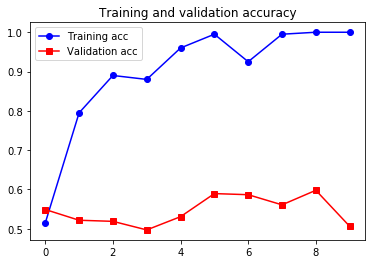

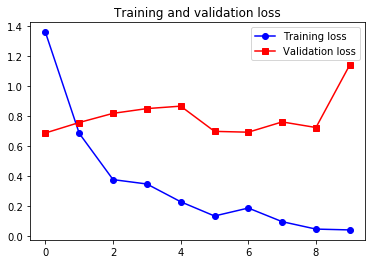

In [52]:
# 绘制结果

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

只用 200 个训练样本还是太难了，但用预训练词嵌入还是得到了不错的成果的。作为对比，看看如果不使用预训练，会是什么样的：

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 72ms/step - loss: 0.6972 - acc: 0.4600 - val_loss: 0.6921 - val_acc: 0.5150
Epoch 2/10
7/7 [==============================] - 0s 46ms/step - loss: 0.4991 - acc: 1.0000 - val_loss: 0.6901 - 

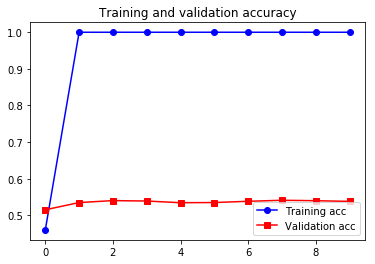

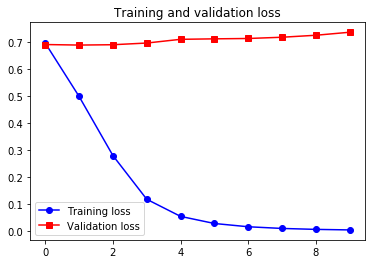

In [53]:
# 构建模型

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# 不使用 GloVe 词嵌入

# 训练

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

# 绘制结果

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

可以看到，在这个例子中，预训练词嵌入的性能要优于与任务一起学习的词嵌入。但如果有大量的可用数据，用一个 Embedding 层去与任务一起训练，通常比使用预训练词嵌入更加强大。

最后，再来看一下测试集上的结果：

In [54]:
# 对测试集数据进行分词

test_dir = os.path.join(imdb_dir, 'test')

texts = []
labels = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

# 在测试集上评估模型

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 983us/step - loss: 1.1397 - acc: 0.5127


[1.1397335529327393, 0.512719988822937]

emmm，最后的进度是令人惊讶的 50%+ ！只用如此少的数据来训练还是难啊。